In [ ]:
import numpy as np # linear algebra
import pandas as pd 

In [ ]:
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score
from sklearn import tree

In [ ]:

data = pd.read_csv("googleplaystore.csv")

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.shape

(10841, 13)

In [ ]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
data.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#rating null restored
data['Rating'] = data['Rating'].fillna(data['Rating'].median())
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]

for i in replaces:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))
    
regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']

for j in regex:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))
    
data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
data['Current Ver'] = data['Current Ver'].fillna(data['Current Ver'].median())

In [ ]:
data['Current Ver']

0        1.00
1        2.00
2        1.24
3        0.00
4        1.10
         ... 
10836    1.48
10837    1.00
10838    1.00
10839    0.00
10840    0.00
Name: Current Ver, Length: 10841, dtype: float64

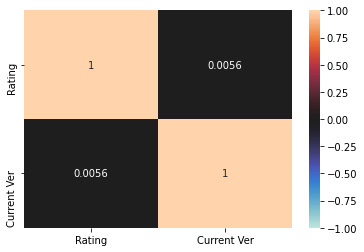

In [ ]:
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [ ]:
#install column restore
data['Installs']=data['Installs'].astype(str).apply(lambda x : x.replace('Free','0').replace('+','').replace(',','')).astype(int)

data['Size']=data['Size'].apply(lambda x : x.replace('Varies with device','0'))
data['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10836     53M
10837    3.6M
10838    9.5M
10839       0
10840     19M
Name: Size, Length: 10841, dtype: object

In [ ]:
k_indices = data['Size'].loc[data['Size'].str.contains('k')].index.tolist()
#take 50k, k into a different list
print(k_indices)

converter = pd.DataFrame(data.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
data.loc[k_indices,'Size'] = converter

[58, 209, 384, 450, 458, 479, 768, 775, 1019, 1521, 1523, 1532, 1542, 1544, 1553, 2244, 2263, 2267, 2273, 2278, 2279, 2523, 2524, 3340, 3346, 3350, 3393, 3408, 3418, 3517, 3537, 4024, 4078, 4108, 4121, 4156, 4178, 4192, 4250, 4330, 4364, 4418, 4435, 4437, 4439, 4541, 4552, 4571, 4582, 4664, 4734, 4761, 4871, 4897, 4917, 4953, 4956, 4970, 4973, 4977, 4978, 4983, 5012, 5035, 5046, 5051, 5060, 5130, 5144, 5149, 5222, 5245, 5248, 5255, 5336, 5359, 5449, 5451, 5460, 5482, 5503, 5561, 5578, 5587, 5722, 5783, 5792, 5812, 5832, 5911, 5912, 5936, 5963, 6007, 6015, 6044, 6085, 6121, 6240, 6273, 6292, 6317, 6351, 6361, 6380, 6428, 6503, 6505, 6507, 6510, 6512, 6514, 6515, 6517, 6520, 6522, 6523, 6524, 6525, 6526, 6527, 6531, 6533, 6535, 6536, 6537, 6539, 6540, 6541, 6584, 6600, 6602, 6603, 6671, 6689, 6699, 6708, 6727, 6728, 6732, 6735, 6737, 6741, 6750, 6753, 6763, 6768, 6774, 6777, 6788, 6798, 6803, 6806, 6807, 6808, 6810, 6902, 6920, 6929, 6934, 6943, 6947, 6969, 6974, 6985, 7080, 7091, 7105, 

In [ ]:
data['Size'] = data['Size'].apply(lambda x: x.strip('M'))
data['Size'] = data['Size'].apply(lambda x: x.strip('+'))
#data['Size'] = data['Size'].apply(lambda x: x.strip(','))
data[data['Size'] == 'Varies with device'] = 0
data[data['Size'] == '1,000'] = 0.001
data['Size'] = data['Size'].astype(float)



In [ ]:
data['Size']
data['Type'].tail(20)

10821    Free
10822    Free
10823    Free
10824    Free
10825    Free
10826    Free
10827    Free
10828    Free
10829    Free
10830    Free
10831    Free
10832    Free
10833    Free
10834    Free
10835    Free
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, dtype: object

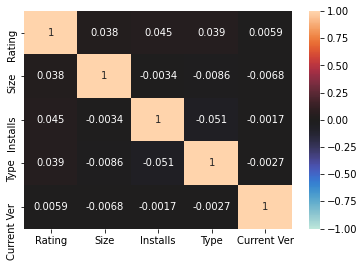

In [ ]:
#type is restored

data[data['Type'] == 'nan'] = 0
data['Type'] = data['Type'].astype(str).apply(lambda x: x.replace('Free','0').replace('Paid','1').replace('nan','0').replace('0.001','0')).astype(int)
data['Type'].head()
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [ ]:
#price restore
data['Price'] = data['Price'].astype(str).apply(lambda x: x.replace('$','0')).astype(float)

print(data['Price'].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64


In [ ]:
data['Android Ver'].tail(30)

10811           4.4W and up
10812          4.0.3 and up
10813            4.1 and up
10814            3.0 and up
10815            4.2 and up
10816            4.1 and up
10817            5.0 and up
10818            2.2 and up
10819            4.1 and up
10820            4.1 and up
10821          4.0.3 and up
10822            4.4 and up
10823          4.0.3 and up
10824            4.4 and up
10825            4.0 and up
10826    Varies with device
10827          4.0.3 and up
10828            4.0 and up
10829            4.1 and up
10830            1.6 and up
10831            4.0 and up
10832            2.1 and up
10833            2.2 and up
10834            4.1 and up
10835            4.0 and up
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, dtype: object

In [ ]:
data[data['Android Ver'] == 'Var'] = 0
data['Android Ver'] = data['Android Ver'].astype(str).str[0:3].astype(float)
data['Android Ver'].head()

0    4.0
1    4.0
2    4.0
3    4.2
4    4.4
Name: Android Ver, dtype: float64

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.00,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.24,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",0.00,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4


In [ ]:
#ML
features = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Current Ver']
#features.extend(CategoryList)

In [ ]:
X = data[features]
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

clf = tree.DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5, random_state=42)

clf.fit(X_train, y_train)
        
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8948698119442136


In [ ]:
pred = clf.predict(X_test)
#pred = pred.transpose()
print(pred)
print()
y_new = np.array(y_test)
print(y_new)

[4.3 4.5 4.2 ... 4.3 4.3 4.1]

[4.1 4.4 4.5 ... 4.7 3.9 4.1]


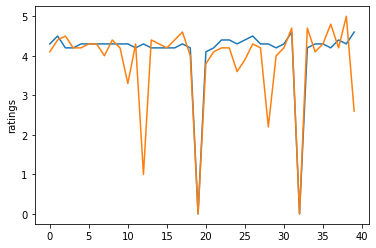

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pred[0:40])
plt.plot(y_new[0:40])
plt.ylabel('ratings')
plt.show()